In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
def plotPred (y_true, preds):
    ymin = np.min(y_true)
    ymax = np.max(y_true)
    plt.scatter(y_true, preds, label=f'score: {r2_score(y_true, preds)}')
    plt.plot([ymin, ymax], [ymin, ymax], '-.', color='red', label="predicted values = true values")
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()

In [3]:
dataframe_encoded = pd.read_csv('Datasets/dataset.csv', nrows=10000)
features = dataframe_encoded.columns[:-1]
cps = dataframe_encoded.columns[-1]

X = dataframe_encoded[features].values
y = dataframe_encoded[cps].values
print(X.shape, y.shape)
dataframe_encoded.head()

(10000, 131) (10000,)


,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,whites to play,castling rights,en passant square,cp (Stockfish 13)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,2.0,0.0,0.0,1.0,8.0,0.0,-1256.0
1,1.0,4.0,0.0,0.0,1.0,3.0,1.0,5.0,1.0,6.0,...,-1.0,3.0,-1.0,2.0,-1.0,4.0,1.0,15.0,0.0,11.0
2,1.0,4.0,1.0,2.0,1.0,3.0,1.0,5.0,1.0,6.0,...,-1.0,3.0,-1.0,2.0,-1.0,4.0,0.0,15.0,0.0,3.0
3,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,4.0,0.0,0.0,0.0,-97.0
4,1.0,4.0,1.0,2.0,1.0,3.0,1.0,5.0,1.0,6.0,...,-1.0,3.0,0.0,0.0,-1.0,4.0,1.0,15.0,0.0,126.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
model = SVR(kernel='rbf', C=600)

In [6]:
%%time
model.fit(X_train, y_train)

CPU times: user 7.95 s, sys: 136 ms, total: 8.08 s
Wall time: 8.13 s


SVR(C=600)

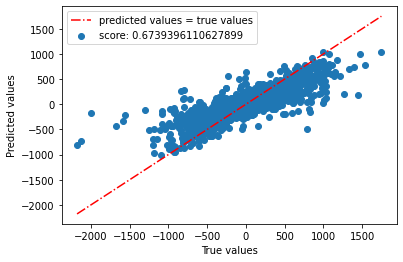

In [7]:
plotPred (y_test, model.predict(X_test))

In [8]:
test_df = pd.read_csv('Datasets/test_dataset.csv')
features = test_df.columns[:-1]
cps = test_df.columns[-1]

boards = test_df[features].values
scores = test_df[cps].values
print(boards.shape, scores.shape)
preds = model.predict(boards)

(200000, 131) (200000,)


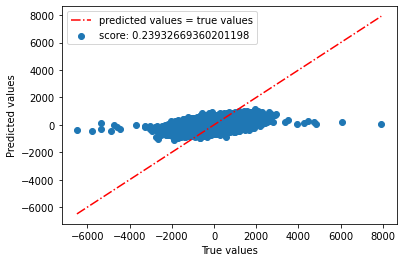

In [9]:
plotPred (scores, preds)